# **>**CAR PRICE ESTIMATION MODEL: RIDGE & LASSO TECHNIQUES**<**

# 1. Import Libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# 2. Load Dataset & Display Dataset Overview

In [58]:
# 2. Load Dataset & Display Overview
data_path = r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\CODEALPHA - DATA SCIENCE\Car Price Prediction with Machine Learning Project\car data.csv"
df = pd.read_csv(data_path)
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


# 3. Data Preprocessing

In [59]:
# 3. Data Preprocessing
# Handle missing values
print("Missing Values:\n", df.isnull().sum())
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Outlier Detection and Removal using IQR for Driven_kms
Q1 = df['Driven_kms'].quantile(0.25)
Q3 = df['Driven_kms'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Driven_kms'] < (Q1 - 1.5 * IQR)) | (df['Driven_kms'] > (Q3 + 1.5 * IQR)))]

# Logarithmic transformation for Selling_Price and Present_Price
df['Selling_Price'] = np.log(df['Selling_Price'])
df['Present_Price'] = np.log(df['Present_Price'])

# Convert categorical features to numeric
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

# Feature Engineering: Convert 'Year' to age of the car
df['Age'] = 2024 - df['Year']

# Drop irrelevant columns
df = df.drop(['Car_Name', 'Year'], axis=1)

# Additional Statistics
print("Data Description:\n", df.describe())
print("Data Types:\n", df.dtypes)

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
Data Description:
        Selling_Price  Present_Price    Driven_kms   Fuel_Type  Selling_type  \
count     291.000000     291.000000    291.000000  291.000000    291.000000   
mean        0.910938       1.409809  32591.312715    1.797251      0.347079   
std         1.254598       1.207072  21496.425963    0.419515      0.476861   
min        -2.302585      -1.139434    500.000000    0.000000      0.000000   
25%        -0.105361       0.182322  15000.000000    2.000000      0.000000   
50%         1.294727       1.800058  31000.000000    2.000000      0.000000   
75%         1.791759       2.240710  46140.000000    2.000000      1.000000   
max         3.555348       4.528289  92233.000000    2.000000      1.000000   

       Transmission       Owner         Age  
count    291.000000  2

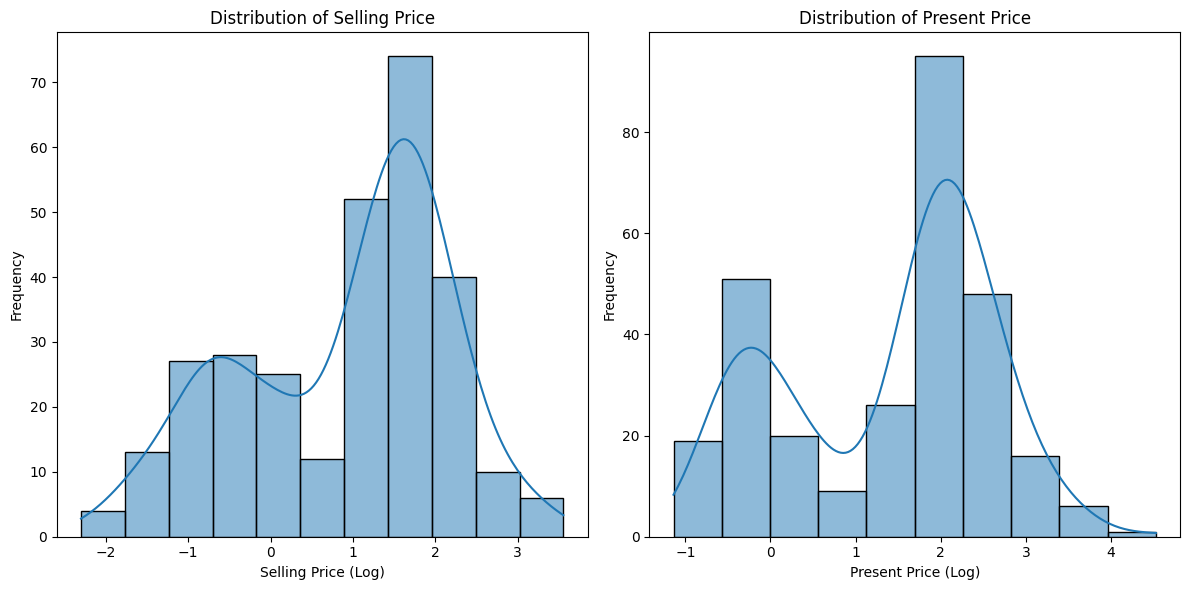

In [60]:
# Distribution Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (Log)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Present_Price'], kde=True)
plt.title('Distribution of Present Price')
plt.xlabel('Present Price (Log)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

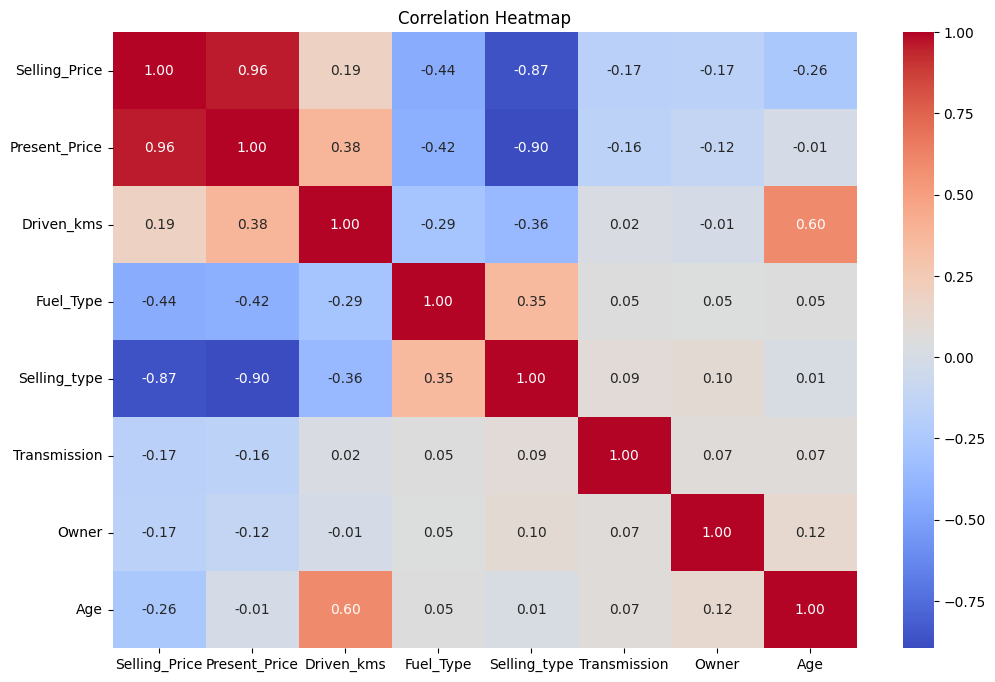

In [61]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

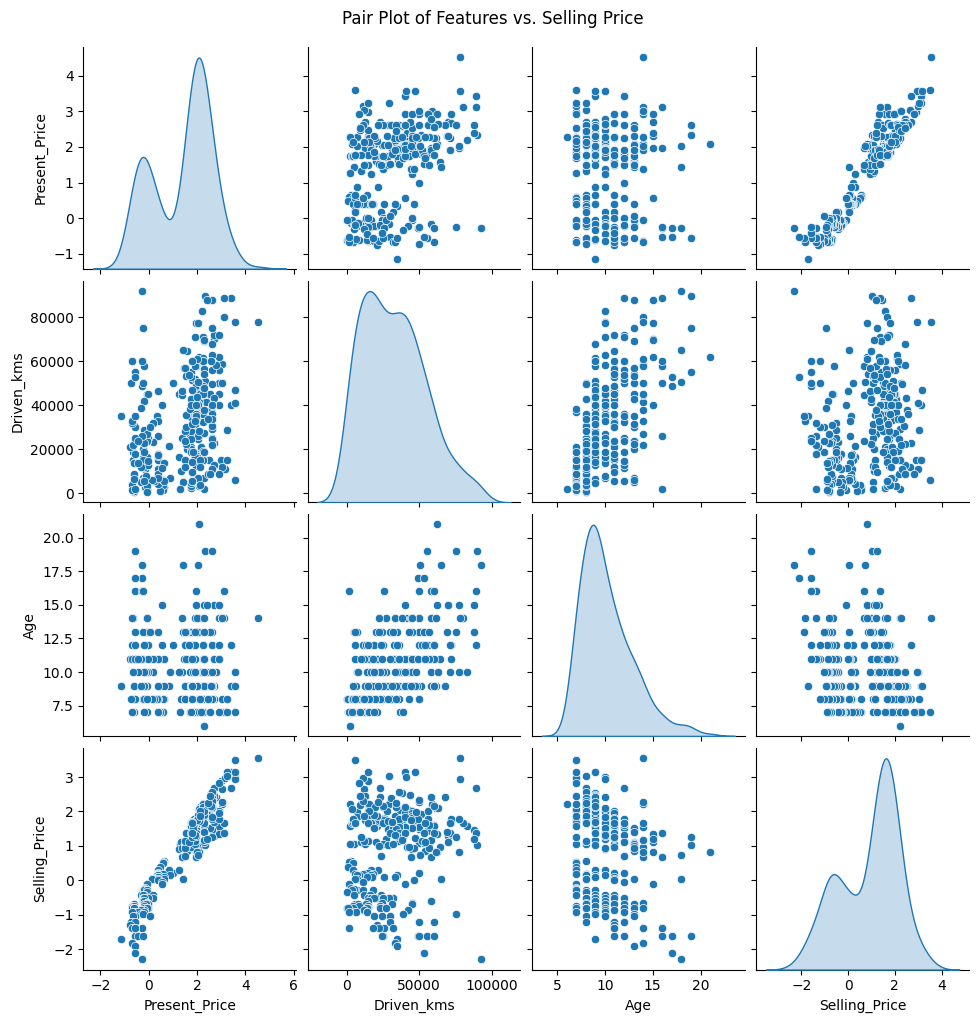

In [62]:
sns.pairplot(df, vars=['Present_Price', 'Driven_kms', 'Age', 'Selling_Price'], diag_kind='kde')
plt.suptitle('Pair Plot of Features vs. Selling Price', y=1.02)
plt.show()


# 4. Define Features and Target

In [63]:
# 4. Define Features and Target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# 5. Split Data into Training and Testing Sets

In [64]:
# 5. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. Feature Scaling

In [65]:
# 6. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Model Training

In [66]:
# 7. Model Training with Cross-Validation
# Using Ridge and Lasso regression for regularization
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# 8. Make Predictions and Evaluate Model

In [67]:
# Cross-validation scores
ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Ridge RMSE: {np.sqrt(-ridge_cv_scores.mean())}")
print(f"Lasso RMSE: {np.sqrt(-lasso_cv_scores.mean())}")

# Fit the Ridge model
ridge_model.fit(X_train, y_train)

# 8. Make Predictions and Evaluate Model
y_pred = ridge_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse}")
print(f"Test R^2 Score: {r2}")

Ridge RMSE: 0.18753136875271822
Lasso RMSE: 0.24797979634652373
Test RMSE: 0.15840186120287242
Test R^2 Score: 0.9869059203594434


# 9. Feature Importance and Visualization of Predictions

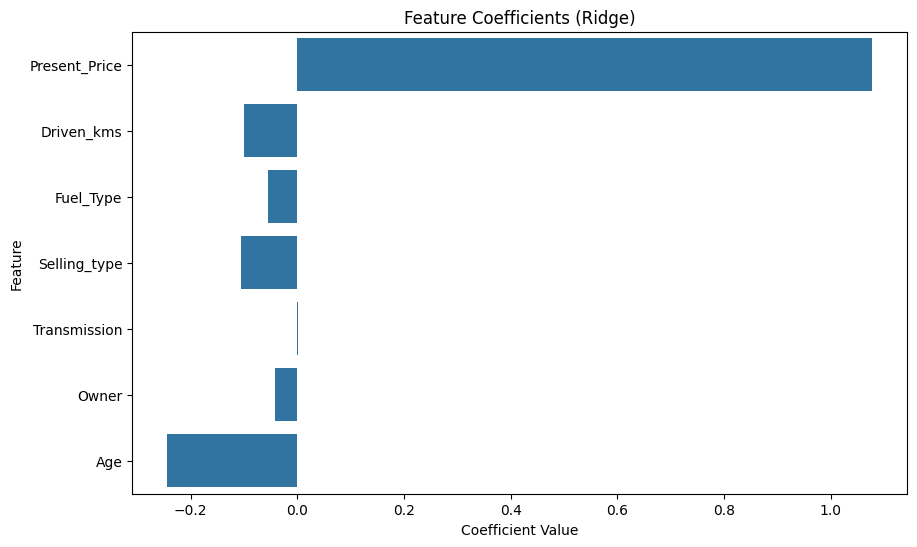

In [68]:
# 1. Feature Coefficients (Ridge)
coefficients = ridge_model.coef_
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=X.columns)
plt.title('Feature Coefficients (Ridge)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

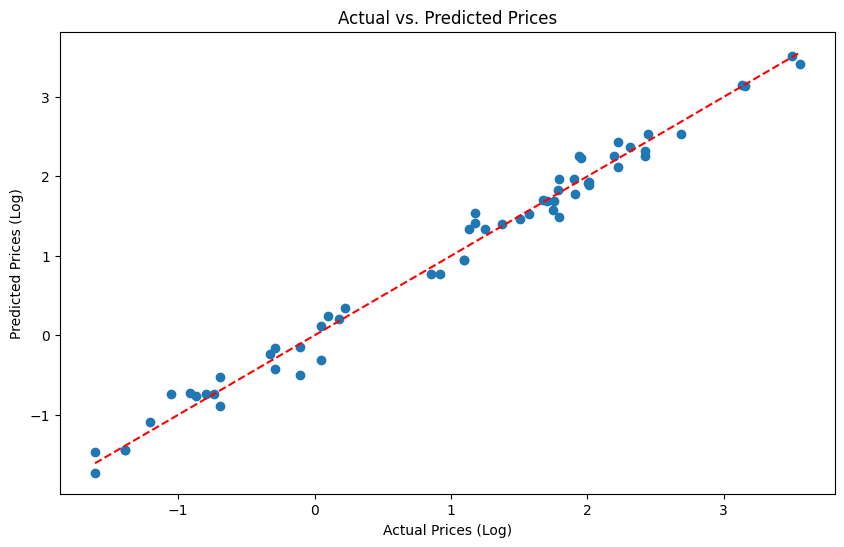

In [69]:
# 2. Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices (Log)')
plt.ylabel('Predicted Prices (Log)')
plt.show()

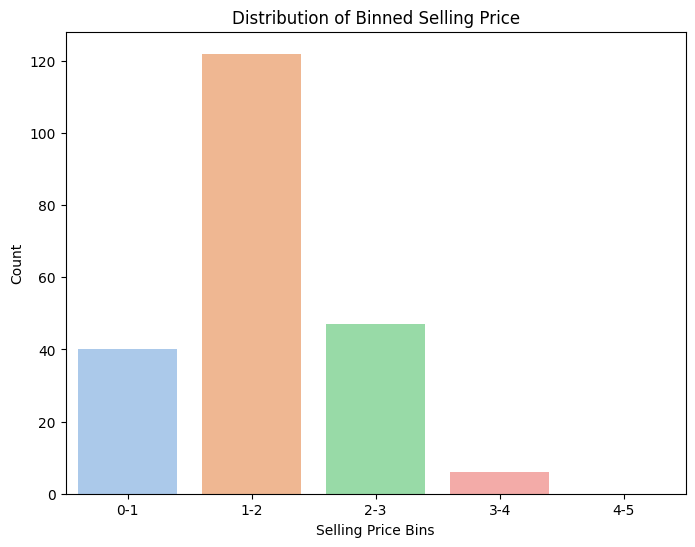

In [70]:
# 3. Binning Selling Price
bins = [0, 1, 2, 3, 4, 5]  # Adjust these bins based on your data
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']  # Labels for the bins

df['Selling_Price_Binned'] = pd.cut(df['Selling_Price'], bins=bins, labels=labels)

# Bar Plot for Distribution of Binned Selling Price
price_counts = df['Selling_Price_Binned'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=price_counts.index, y=price_counts.values, palette="pastel")
plt.title('Distribution of Binned Selling Price')
plt.xlabel('Selling Price Bins')
plt.ylabel('Count')
plt.show()


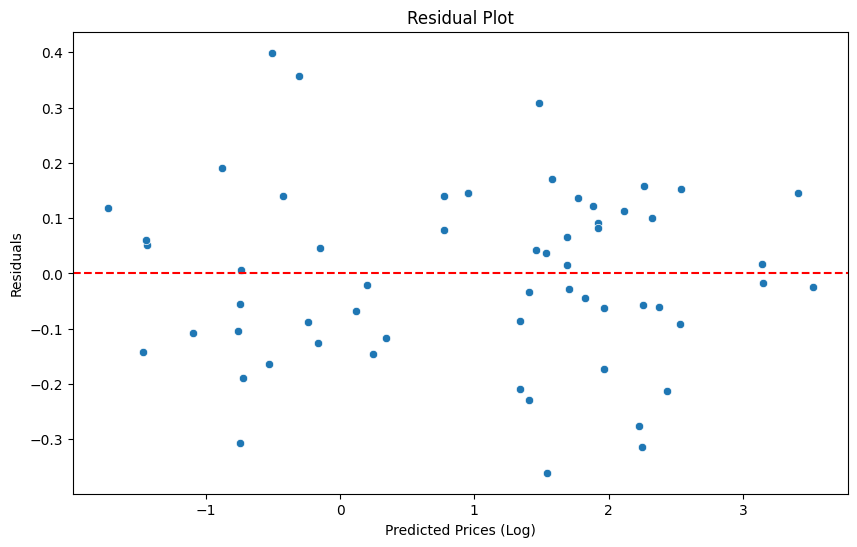

In [71]:
# 4. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Prices (Log)')
plt.ylabel('Residuals')
plt.show()